In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, ifft
import pandas as pd
import numpy as np
from scipy.fft import fftfreq

## First Level Analysis (GLM)

In [34]:
import nibabel as nib
from nilearn import plotting
import numpy as np
from nilearn.image import mean_img, index_img
from nilearn.glm import first_level, threshold_stats_img

In [4]:
anat = nib.load('sub-08_anat_sub-08_T1w.nii')
func = nib.load('swarsub-08_task-flanker_run-1_bold.nii')

events = pd.read_table('sub-08_func_sub-08_task-flanker_run-1_events.tsv')

In [5]:
events

,onset,duration,trial_type,response_time,correctness,StimVar,Rsponse,Stimulus,cond
0,0.0,2.0,incongruent_correct,1.204,correct,2,1,incongruent,cond003
1,10.0,2.0,incongruent_correct,0.808,correct,2,1,incongruent,cond003
2,20.0,2.0,incongruent_correct,0.699,correct,2,1,incongruent,cond003
3,32.0,2.0,congruent_correct,0.567,correct,1,1,congruent,cond001
4,42.0,2.0,congruent_correct,0.490,correct,1,1,congruent,cond001
5,52.0,2.0,incongruent_correct,0.837,correct,2,1,incongruent,cond003
6,64.0,2.0,congruent_correct,0.592,correct,1,1,congruent,cond001
7,76.0,2.0,congruent_correct,0.411,correct,1,1,congruent,cond001
8,88.0,2.0,incongruent_correct,0.646,correct,2,1,incongruent,cond003
9,102.0,2.0,congruent_correct,0.463,correct,1,1,congruent,cond001


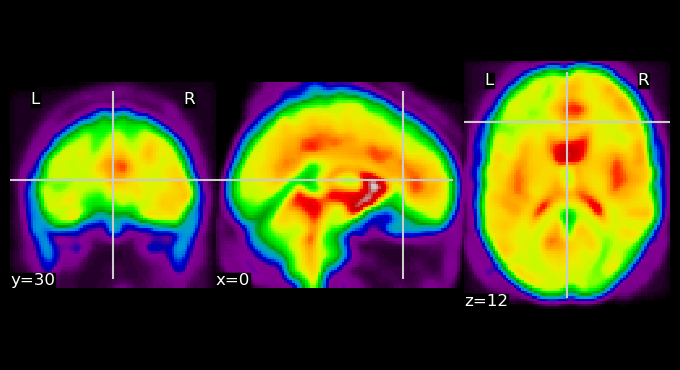

In [9]:
plotting.plot_epi(mean_img(func), cut_coords = [0, 30, 12])

C:\Users\ASUS\anaconda3\lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: Stimulus, StimVar, cond, correctness, response_time, Rsponse
  warnings.warn(


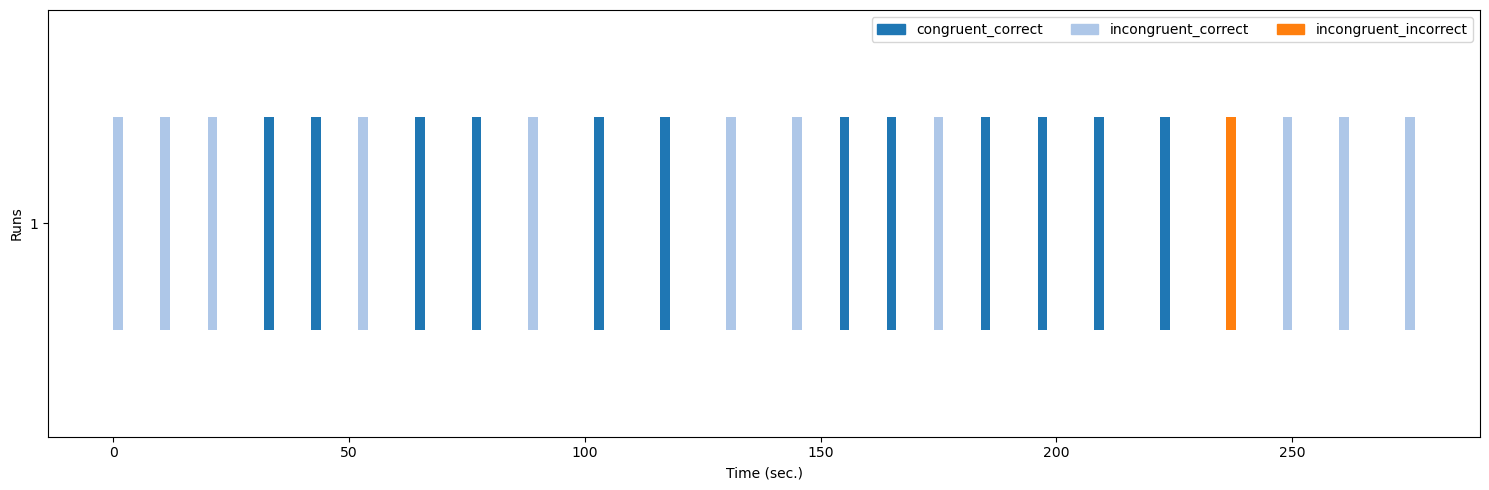

In [10]:
plotting.plot_event(events, figsize = (15,5))
plt.show()

In [11]:
tr = 2
n_volume = func.shape[3]
frame_time = np.arange(n_volume) * tr
design = first_level.make_first_level_design_matrix(frame_time, events,
                                                   drift_model = 'cosine', 
                                                    high_pass = 0.01, 
                                                   hrf_model = 'spm')

C:\Users\ASUS\anaconda3\lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: Stimulus, StimVar, cond, correctness, response_time, Rsponse
  warnings.warn(


Different kinds of Drift Models:
Cosine: Default (model low frequencies)
None : dont do anything

high_pass:
default: 0.01
if it was rest we could put 0.001

hrf_model:
(for theoretical recap see ucl presentation again: spm course)
(as you know why, we put none for rest)

<Axes: label='conditions', ylabel='scan number'>

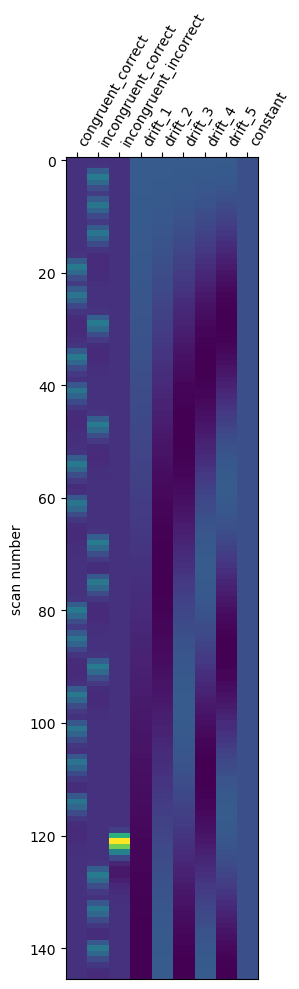

In [16]:
plotting.plot_design_matrix(design)

In [18]:
mean_image = mean_img(func)

In [20]:
fmri_glm = first_level.FirstLevelModel()
fmri_glm2 = fmri_glm.fit(func, design_matrices = design)

## Contrast

In [50]:
design

,congruent_correct,incongruent_correct,incongruent_incorrect,drift_1,drift_2,drift_3,drift_4,drift_5,constant
0,0.0,0.000000,0.0,0.117034,0.117014,0.116980,0.116933,0.116872,1.0
2,0.0,0.019130,0.0,0.116980,0.116797,0.116493,0.116067,0.115520,1.0
4,0.0,0.235975,0.0,0.116872,0.116364,0.115520,0.114342,0.112833,1.0
6,0.0,0.407753,0.0,0.116709,0.115716,0.114067,0.111770,0.108841,1.0
8,0.0,0.305191,0.0,0.116493,0.114853,0.112138,0.108371,0.103590,1.0
...,...,...,...,...,...,...,...,...,...
282,0.0,0.289306,0.0,-0.116493,0.114853,-0.112138,0.108371,-0.103590,1.0
284,0.0,0.133202,0.0,-0.116709,0.115716,-0.114067,0.111770,-0.108841,1.0
286,0.0,0.030935,0.0,-0.116872,0.116364,-0.115520,0.114342,-0.112833,1.0
288,0.0,-0.019018,0.0,-0.116980,0.116797,-0.116493,0.116067,-0.115520,1.0


In [42]:
contrast = np.eye(design.shape[1])
contrast

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [44]:
base_cont = {}
for i, column in enumerate(design.columns):
    base_cont[column] = contrast[i]

In [48]:
base_cont

{'congruent_correct': array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'incongruent_correct': array([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'incongruent_incorrect': array([0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'drift_1': array([0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'drift_2': array([0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'drift_3': array([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'drift_4': array([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'drift_5': array([0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'constant': array([0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [52]:
'Incongruent > congruent'

inc_con = base_cont['incongruent_correct'] - base_cont['congruent_correct']

<Axes: label='conditions'>

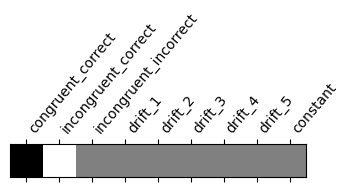

In [56]:
plotting.plot_contrast_matrix(inc_con, design)

In [60]:
z_map = fmri_glm2.compute_contrast([inc_con], output_type = 'z_score')

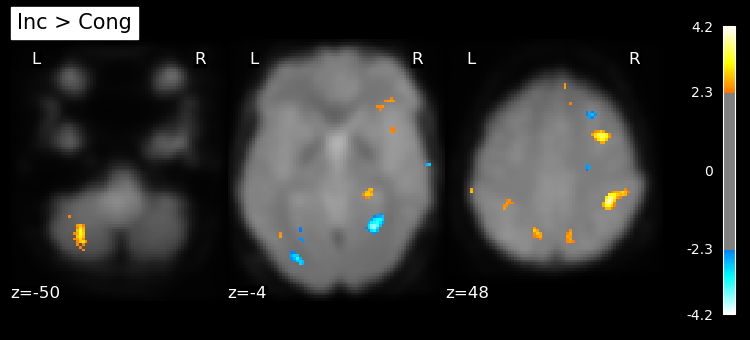

In [62]:
plotting.plot_stat_map(z_map, bg_img = mean_image, threshold = 2.3,
                       display_mode = 'z', cut_coords = 3, title = 'Inc > Cong')